In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.cloud import storage
from io import BytesIO
from sklearn.decomposition import PCA
from skimage.transform import resize

In [20]:

# Function to download a CSV file from GCS to a local path
def download_csv_from_gcs(bucket_name, blob_name, local_path):
    client = storage.Client()
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(blob_name)
    
    # Download the blob to the specified local path
    blob.download_to_filename(local_path)

# Specify your GCS bucket name and the path to the CSV file
bucket_name = 'marketplace-2xim6sjc'  # Update with your bucket name
blob_name = 'NIH Chest X-ray/105/artifactFiles/PruneCXR/miccai2023_nih-cxr-lt_labels_test.csv'  # Update with the path to your CSV file in the bucket
local_csv_path = 'downloaded_file.csv'  # Local path to save the downloaded CSV

# Download the CSV file from GCS
download_csv_from_gcs(bucket_name, blob_name, local_csv_path)

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(local_csv_path, index_col=0)  # Use the first column as row names
df.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
id,,,,,,,,,,,,,,,,,,,,,
00000013_000.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13
00000013_001.png,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,13
00000013_002.png,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,13
00000013_003.png,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,13
00000013_004.png,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,13


In [18]:
# Drop the specified columns
df_filtered = df.drop(columns=['No Finding', 'subj_id'], errors='ignore')
# Convert the DataFrame to a NumPy array for PCA
data_array = df_filtered.values  # This will give you just the numeric data



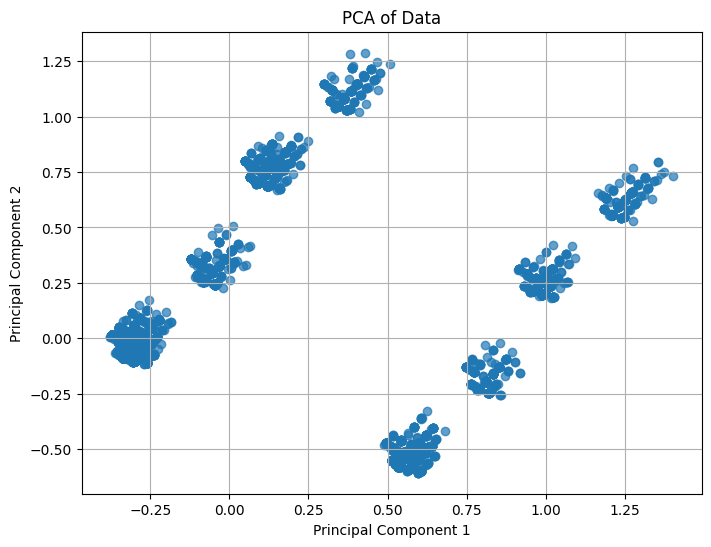

In [19]:
# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components
pca_result = pca.fit_transform(data_array)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df.index)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)

plt.title('PCA of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

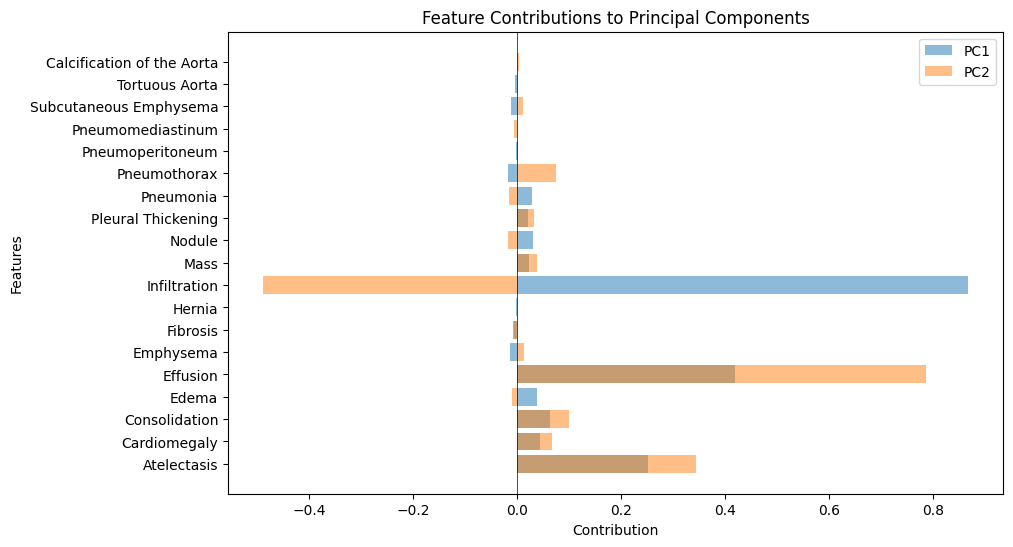

In [22]:
# Feature Contribution Analysis
feature_names = df_filtered.columns
components = pca.components_

# Plot the feature contributions to the first two principal components
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.barh(feature_names, components[i], alpha=0.5, label=f'PC{i + 1}')

plt.title('Feature Contributions to Principal Components')
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.show()